# Comparison check between Rosie's original run and latest updates

## Import libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ctsm_py.fates_xarray_funcs as fx

## Load history output data

In [72]:
data_rosie_base = xr.open_dataset('seb_CLM5-SPfates-def_rewindtest0.clm2.h0.2001.nc')
data_rosie_last = xr.open_dataset('greg_sp_test_nosai.clm2.h0.2001.nc')
data_greg_last = xr.open_dataset('sp_mode-dev053-2year-srof.fates-sci.1.46.2_api.16.1.0-ctsm5.1.dev053-Ca887ad1f-F51112204.intel.clm2.h0.2001.nc')

## Check the dimension mapping size

## Plot the data

### TLAI

The plots of TLAI below represent the type correction that [Charlie recommended](https://github.com/ESCOMP/CTSM/pull/1182#discussion_r694458033).  We can see comparing the first and second plot to the third, that the TLAI looks correct as of [this commit](https://github.com/ESCOMP/CTSM/pull/1182/commits/b9f4ef9a1eb81981acee8628c0660a9bf6a93fa0).

In [74]:
data_rosie_base.TLAI.dims

('time', 'lat', 'lon')

In [75]:
data_rosie_base.TLAI.time.size

12

In [76]:
tlai_rosie_base = data_rosie_base.TLAI
tlai_rosie_last = data_rosie_last.TLAI
tlai_greg_last = data_greg_last.TLAI
tlai_rbrl_diff = tlai_rosie_base - tlai_rosie_last
tlai_rbgl_diff = tlai_rosie_base - tlai_greg_last
tlai_rlgl_diff = tlai_rosie_last - tlai_greg_last

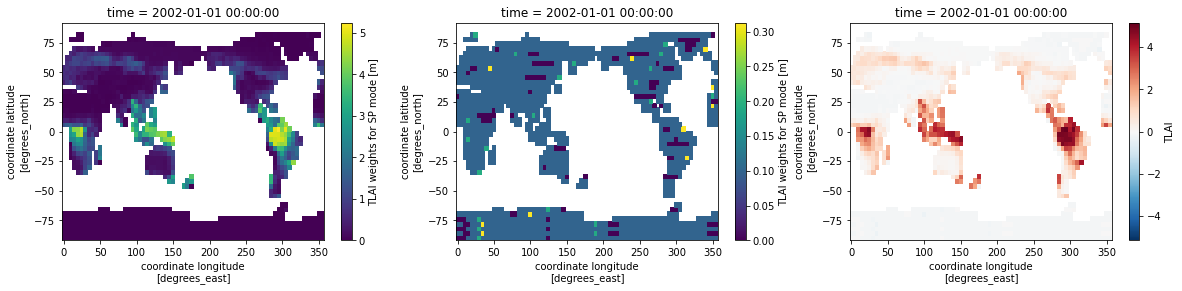

In [79]:
# Rosie baseline - Rosie latest comparison
tstop_idx = 11
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_rosie_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbrl_diff.isel(time=tstop_idx).plot(ax=ax3)

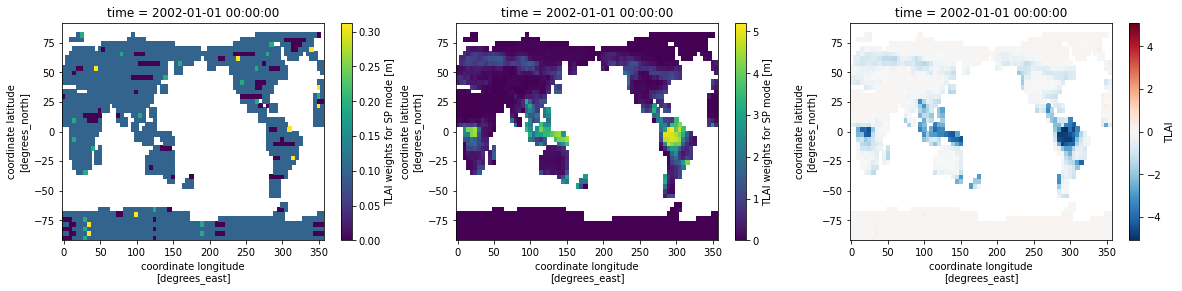

In [80]:
# Rosie latest - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_last.isel(time=tstop_idx).plot(ax=ax1)
tlai_greg_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rlgl_diff.isel(time=tstop_idx).plot(ax=ax3)

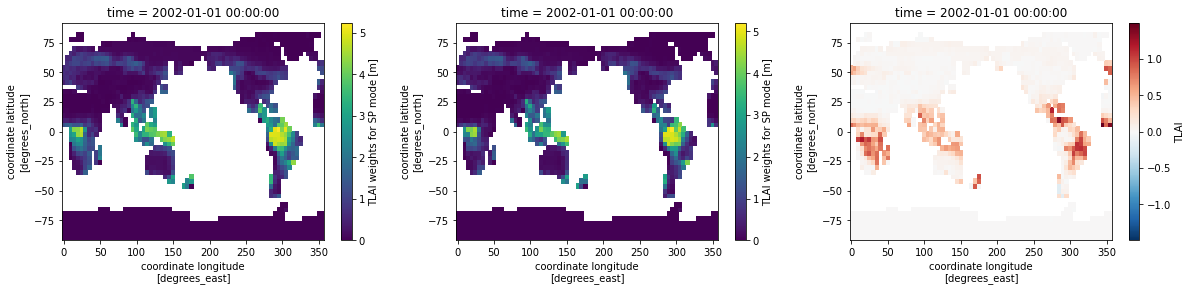

In [78]:
# Rosie baseline - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
tlai_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
tlai_greg_last.isel(time=tstop_idx).plot(ax=ax2)
tlai_rbgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### GPP

In [54]:
data_rosie_base.GPP.dims

('time', 'lat', 'lon')

In [82]:
gpp_rosie_base = data_rosie_base.GPP
gpp_rosie_last = data_rosie_last.GPP
gpp_greg_last = data_greg_last.GPP
gpp_rbrl_diff = gpp_rosie_base - gpp_rosie_last
gpp_rbgl_diff = gpp_rosie_base - gpp_greg_last
gpp_rlgl_diff = gpp_rosie_last - gpp_greg_last

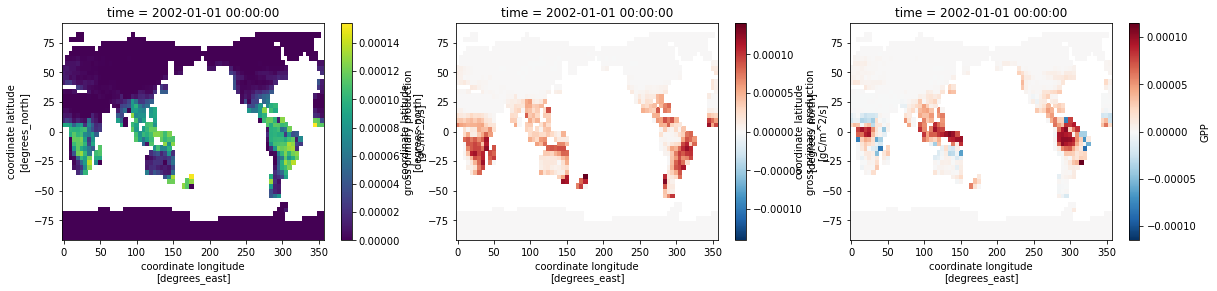

In [83]:
# Rosie baseline - Rosie latest comparison
levrng = np.arange(0.,0.00015,0.00001)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_rosie_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbrl_diff.isel(time=tstop_idx).plot(ax=ax3)

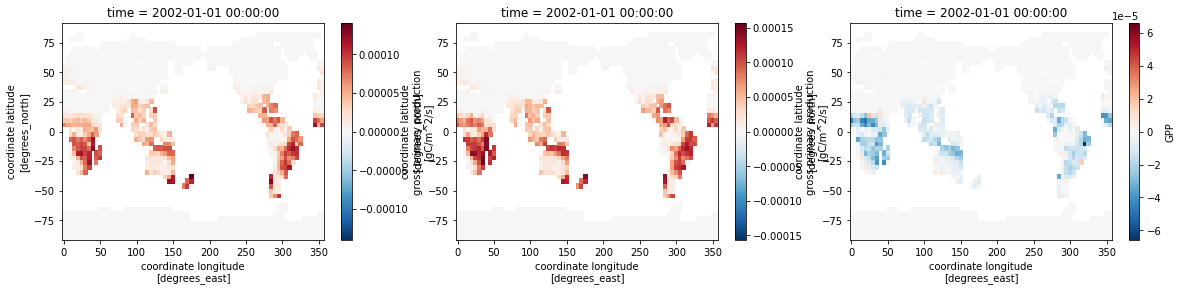

In [84]:
# Rosie latest - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_last.isel(time=tstop_idx).plot(ax=ax1)
gpp_greg_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rlgl_diff.isel(time=tstop_idx).plot(ax=ax3)

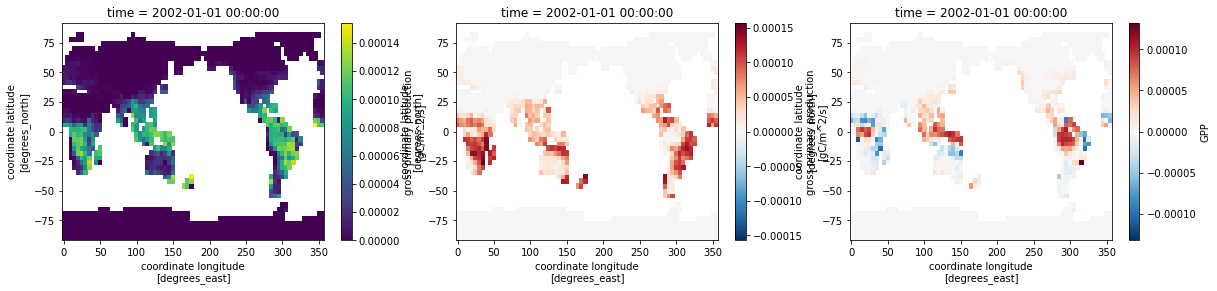

In [85]:
# Rosie baseline - Greg latest comparison
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
gpp_rosie_base.isel(time=tstop_idx).plot(ax=ax1)
gpp_greg_last.isel(time=tstop_idx).plot(ax=ax2)
gpp_rbgl_diff.isel(time=tstop_idx).plot(ax=ax3)

### PFTbiomass

In [86]:
data_rosie_base.PFTbiomass.dims

('time', 'fates_levpft', 'lat', 'lon')

In [87]:
data_rosie_base.PFTbiomass.fates_levpft.size

12

In [88]:
pbm_rosie_base = data_rosie_base.PFTbiomass
pbm_rosie_last = data_rosie_last.PFTbiomass
pbm_greg_last = data_greg_last.PFTbiomass
pbm_rbrl_diff = pbm_rosie_base - pbm_rosie_last
pbm_rbgl_diff = pbm_rosie_base - pbm_greg_last
pbm_rlgl_diff = pbm_rosie_last - pbm_greg_last

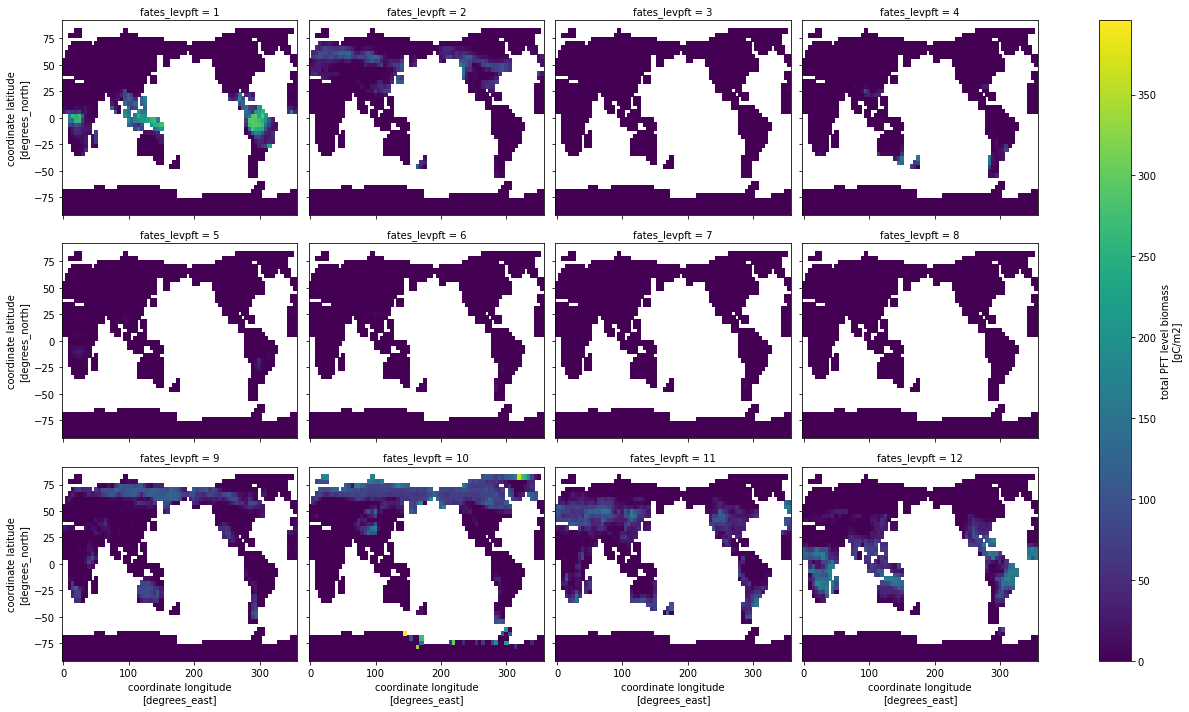

In [91]:
# Rosie baseline: all levels
pbm_rosie_base.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10))

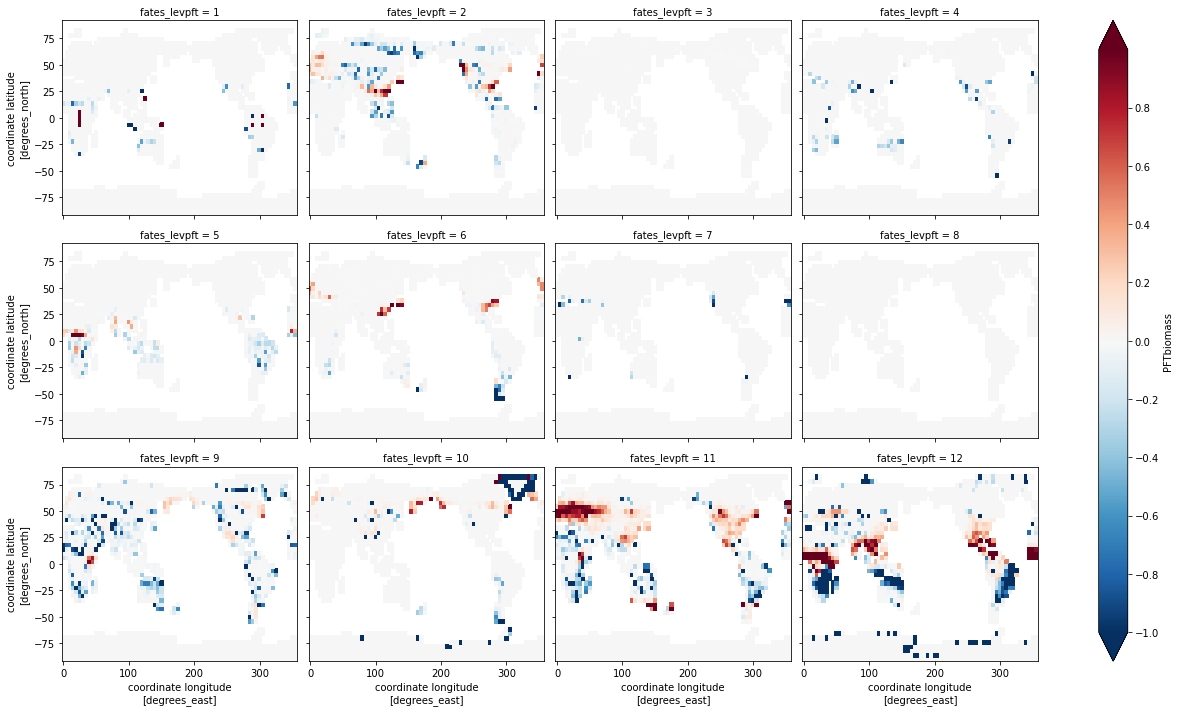

In [92]:
# Rosie baseline-Rosie latest: all levels
levrng = np.arange(-1,1,.001)
pbm_rbrl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10),levels=levrng)

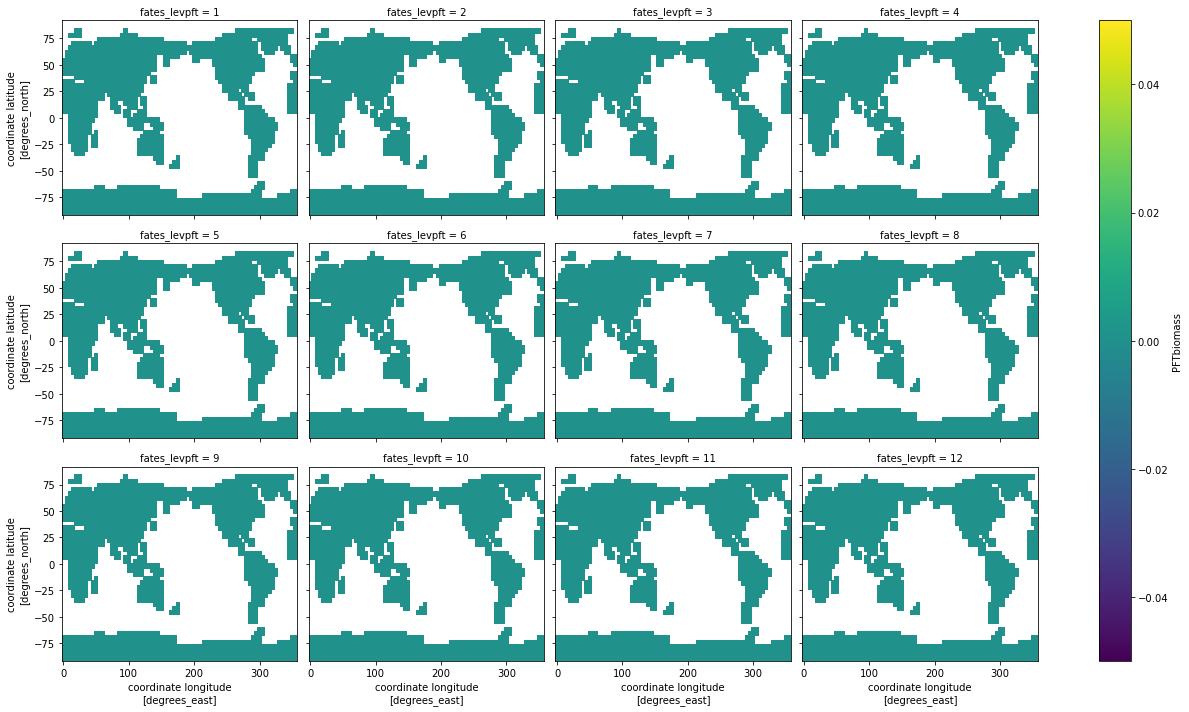

In [93]:
# Rosie latest - Greg latest: all levels
pbm_rlgl_diff.isel(time=tstop_idx).plot(x='lon',y='lat',col='fates_levpft',col_wrap=4,figsize=(18,10))